<a href="https://colab.research.google.com/github/JJThoms1/end-to-end-second-hand-car-sales-regression/blob/main/end_to_end_second_hand_car_sales_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚘 Predicting the sale of Second Hand Cars Using Machine Learning

In this notebook, I'll be going through examples of Machine Learning with the goal of predicting the sale price of Second Hand Cars.


### 1. Problem Definition

* How well can we predict the future sale price of a our second hand car, given its characteristics and previous examples of how much similar our second hand cars have been sold for?

### 2. Data Preprocessing

* Load and preprocess the dataset, which includes handling missing values, encoding categorical variables (like Manufacturer, Model, and Fuel type), and scaling numerical features if needed.
* Split the dataset into training and testing sets to train and evaluate the Random Forest Regressor.

### 3. Training the Random Forest Regressor Model

* Import the Random Forest Regressor from a machine learning library like scikit-learn.
* Define the features (X) and the target variable (y) from the dataset.
* Create an instance of the Random Forest Regressor model with appropriate hyperparameters `(e.g., number of estimators, max depth)`.
* Fit the model to the training data using the `fit()` method.

### 4. Model Evaluation

* Evaluate the performance of the Random Forest Regressor on the testing set using metrics like Mean Squared Error (MSE), R-squared, or Mean Absolute Error (MAE).

### 5. Feature Importance

* Analyze the feature importance provided by the Random Forest Regressor to understand which features (Engine Size, Year of Manufacture, Mileage, Manufacturer, Model, Fuel type) have the most significant impact on predicting car prices.
* Visualize the feature importance using a bar chart or other suitable visualization techniques.

### 6. Fine-Tuning the Model

* Optionally, you can fine-tune the hyperparameters of the Random Forest Regressor model using techniques like Grid Search or Random Search to optimize its performance.

### 7. Interpretation and Conclusion

* Interpret the results from the Random Forest Regressor model and the feature importance analysis to gain insights into what factors most affect car prices in our dataset.
* Summarize our findings and conclusions based on the model's performance and the insights gathered from the analysis.


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from datetime import time

In [2]:
# import and load datasets
df = pd.read_csv("/content/drive/MyDrive/second_hand_car_sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine Size (L)      50000 non-null  float64
 3   Fuel Type            50000 non-null  object 
 4   Year of Manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price (£)            50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [4]:
df.isna()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False


In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price (£)'],
      dtype='object')

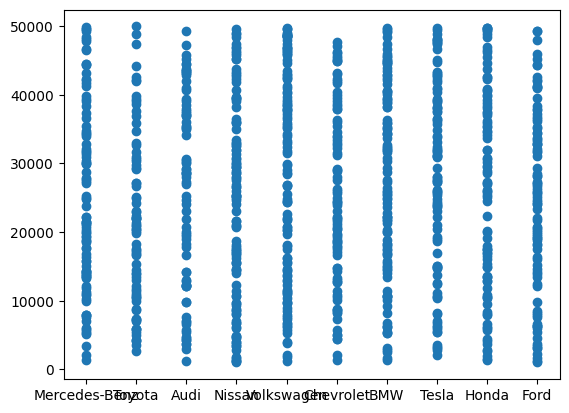

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["Manufacturer"][:1000], df["Price (£)"][:1000]);

In [7]:
df.Manufacturer[:1000]

0      Mercedes-Benz
1             Toyota
2               Audi
3             Nissan
4      Mercedes-Benz
           ...      
995            Tesla
996             Ford
997           Toyota
998            Tesla
999            Tesla
Name: Manufacturer, Length: 1000, dtype: object

In [8]:
df.Manufacturer.dtype

dtype('O')

In [9]:
df.head()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,Mercedes-Benz,Cruze,1.418475,Electric,2013,61837,34792
1,Toyota,A4,4.492330,Electric,2003,128993,27129
2,Audi,C-Class,4.739375,Electric,2000,81362,29141
3,Nissan,Model 3,3.128423,Petrol,2011,168204,24731
4,Mercedes-Benz,Golf,1.650279,Diesel,2006,119405,27493


Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.


In [10]:
# Make a copy
df_tmp = df.copy()

In [11]:
df_tmp.head()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,Mercedes-Benz,Cruze,1.418475,Electric,2013,61837,34792
1,Toyota,A4,4.492330,Electric,2003,128993,27129
2,Audi,C-Class,4.739375,Electric,2000,81362,29141
3,Nissan,Model 3,3.128423,Petrol,2011,168204,24731
4,Mercedes-Benz,Golf,1.650279,Diesel,2006,119405,27493


In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine Size (L)      50000 non-null  float64
 3   Fuel Type            50000 non-null  object 
 4   Year of Manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price (£)            50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [13]:
df_tmp.isna()

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price (£)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False


### Convert strings into categories

Now we'll convert our data into numbers to categorized our data. This would be done via pandas.

In [14]:
# Find the columns that contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Manufacturer
Model
Fuel Type


In [15]:
# Convert categorical features to numerical using one-hot encoding
df_tmp = pd.get_dummies(df_tmp, columns=['Manufacturer', 'Model', 'Fuel Type'])

In [16]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [17]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Engine Size (L)             50000 non-null  float64
 1   Year of Manufacture         50000 non-null  int64  
 2   Mileage                     50000 non-null  int64  
 3   Price (£)                   50000 non-null  int64  
 4   Manufacturer_Audi           50000 non-null  bool   
 5   Manufacturer_BMW            50000 non-null  bool   
 6   Manufacturer_Chevrolet      50000 non-null  bool   
 7   Manufacturer_Ford           50000 non-null  bool   
 8   Manufacturer_Honda          50000 non-null  bool   
 9   Manufacturer_Mercedes-Benz  50000 non-null  bool   
 10  Manufacturer_Nissan         50000 non-null  bool   
 11  Manufacturer_Tesla          50000 non-null  bool   
 12  Manufacturer_Toyota         50000 non-null  bool   
 13  Manufacturer_Volkswagen     500

In [18]:
# Check missing data
df_tmp.isna().sum()/len(df_tmp)

Engine Size (L)               0.0
Year of Manufacture           0.0
Mileage                       0.0
Price (£)                     0.0
Manufacturer_Audi             0.0
Manufacturer_BMW              0.0
Manufacturer_Chevrolet        0.0
Manufacturer_Ford             0.0
Manufacturer_Honda            0.0
Manufacturer_Mercedes-Benz    0.0
Manufacturer_Nissan           0.0
Manufacturer_Tesla            0.0
Manufacturer_Toyota           0.0
Manufacturer_Volkswagen       0.0
Model_3 Series                0.0
Model_A4                      0.0
Model_Altima                  0.0
Model_C-Class                 0.0
Model_Civic                   0.0
Model_Corolla                 0.0
Model_Cruze                   0.0
Model_Fiesta                  0.0
Model_Golf                    0.0
Model_Model 3                 0.0
Fuel Type_Diesel              0.0
Fuel Type_Electric            0.0
Fuel Type_Hybrid              0.0
Fuel Type_Petrol              0.0
dtype: float64

### Save preprocessed data

In [19]:
# Create the directory if it doesn't exist
directory_path = "drive/MyDrive/second_hand_car_sales"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Export current tmp DataFrame
df_tmp.to_csv("drive/MyDrive/second_hand_car_sales/train_tmp.csv",
              index=False)

In [20]:
# Import preprocessed data
df_tmp = pd.read_csv("drive/MyDrive/second_hand_car_sales/train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
Engine Size (L),1.418475,4.49233,4.739375,3.128423,1.650279
Year of Manufacture,2013,2003,2000,2011,2006
Mileage,61837,128993,81362,168204,119405
Price (£),34792,27129,29141,24731,27493
Manufacturer_Audi,False,False,True,False,False
Manufacturer_BMW,False,False,False,False,False
Manufacturer_Chevrolet,False,False,False,False,False
Manufacturer_Ford,False,False,False,False,False
Manufacturer_Honda,False,False,False,False,False
Manufacturer_Mercedes-Benz,True,False,False,False,True


In [21]:
df_tmp.isna().sum()

Engine Size (L)               0
Year of Manufacture           0
Mileage                       0
Price (£)                     0
Manufacturer_Audi             0
Manufacturer_BMW              0
Manufacturer_Chevrolet        0
Manufacturer_Ford             0
Manufacturer_Honda            0
Manufacturer_Mercedes-Benz    0
Manufacturer_Nissan           0
Manufacturer_Tesla            0
Manufacturer_Toyota           0
Manufacturer_Volkswagen       0
Model_3 Series                0
Model_A4                      0
Model_Altima                  0
Model_C-Class                 0
Model_Civic                   0
Model_Corolla                 0
Model_Cruze                   0
Model_Fiesta                  0
Model_Golf                    0
Model_Model 3                 0
Fuel Type_Diesel              0
Fuel Type_Electric            0
Fuel Type_Hybrid              0
Fuel Type_Petrol              0
dtype: int64

In [22]:
len(df_tmp)

50000

### Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [23]:
# Let's build our Machine Learning Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,
                            random_state=42)
model.fit(df_tmp.drop("Price (£)", axis=1), df_tmp["Price (£)"])

RandomForestRegressor(random_state=42)

In [24]:
# Score the model
model.score(df_tmp.drop("Price (£)", axis=1), df_tmp["Price (£)"])

0.8545759096754731

In [25]:
df_tmp.head()

,Engine Size (L),Year of Manufacture,Mileage,Price (£),Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Mercedes-Benz,...,Model_Civic,Model_Corolla,Model_Cruze,Model_Fiesta,Model_Golf,Model_Model 3,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol
0,1.418475,2013,61837,34792,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,4.492330,2003,128993,27129,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4.739375,2000,81362,29141,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3.128423,2011,168204,24731,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,1.650279,2006,119405,27493,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False


### Splitting the data into Train/Validation sets

In [26]:
# Split data into training and validation
df_val = df_tmp[df_tmp["Year of Manufacture"] > 2016]
df_train = df_tmp[df_tmp["Year of Manufacture"] <= 2016]

len(df_val), len(df_train)

(12888, 37112)

In [27]:
# Split data into X & y
X_train, y_train = df_train.drop("Price (£)", axis=1), df_train["Price (£)"]
X_valid, y_valid = df_val.drop("Price (£)", axis=1), df_val["Price (£)"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((37112, 27), (37112,), (12888, 27), (12888,))

In [28]:
y_train

0        34792
1        27129
2        29141
3        24731
4        27493
         ...  
49992    44846
49993    12667
49996    27877
49997    42132
49999    42007
Name: Price (£), Length: 37112, dtype: int64

### Building an evacuation function

In [29]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """
  Evaluate Root Mean Square Log error between the prediction and true labels
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores

### Testing our model on a subset (to tune the hyperparameters)

In [30]:
len(X_train)

37112

In [31]:
# Change max_sample values
model = RandomForestRegressor(n_jobs=1,
                              random_state=42,
                              max_samples=10000)

In [32]:
# Cutting down on the max number of samples each estimator can see improves our training time
%%time
model.fit(X_train, y_train)

CPU times: user 9.3 s, sys: 60 ms, total: 9.36 s
Wall time: 9.33 s


RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=42)

In [33]:
(X_train.shape[0] * 100) / 100000

37.112

In [34]:
show_scores(model)

{'Training MAE': 9414.027132733347,
 'Valid MAE': 12295.601671322158,
 'Training RMSLE': 0.7465258677289365,
 'Valid RMSLE': 0.8634286303963822,
 'Training R^2': 0.4009058516160805,
 'Valid R^2': -0.024445674926264038}

In [40]:
%%time
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(20, 200, 20),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=10,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 17.5 s, sys: 31.7 ms, total: 17.5 s
Wall time: 17.6 s


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])},
                   verbose=True)

In [41]:
# Find the best model hyperparameter
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [42]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 12208.746553671434,
 'Valid MAE': 12182.936413325504,
 'Training RMSLE': 0.8642817762836659,
 'Valid RMSLE': 0.8612427877205473,
 'Training R^2': 0.005994381160030038,
 'Valid R^2': -0.0002329717878724047}